About the Dataset:
Total Languages: 17

Columns:

*text — contains short text samples in different languages

*language — the corresponding language label for the text

 This dataset consists of text details for 17 different languages

Languages
1) English
2) Malayalam
3) Hindi
4) Tamil
5) Kannada
6) French
7) Spanish
8) Portuguese
9) Italian
10) Russian
11) Sweedish
12) Dutch
13) Arabic
14) Turkish
15) German
16) Danish
17) Greek

#Step 1: Import Libraries & Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/Language Detection.csv')  # Replace with your file path


#Step 2: Data Analysis

In [3]:
# View top rows
print(df.head())

                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English


In [4]:
# Check shape and basic info
print("Dataset shape:", df.shape)
print(df.info())

Dataset shape: (10337, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB
None


In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Text        0
Language    0
dtype: int64


In [6]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 66


In [8]:
# Unique languages
print("Unique languages:", df['Language'].nunique())
print(df['Language'].value_counts())


Unique languages: 17
Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64


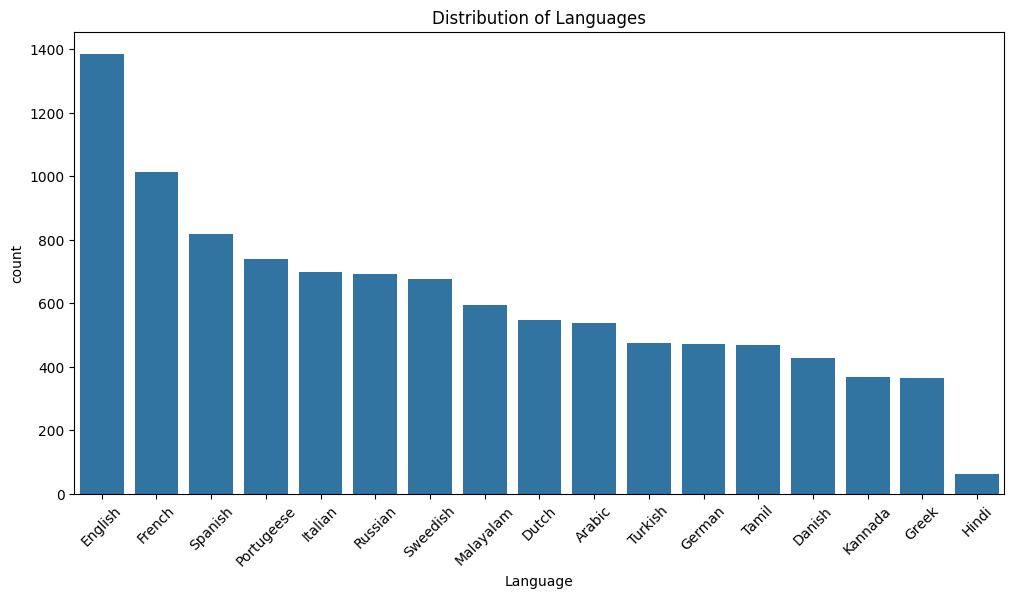

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Language', order=df['Language'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Languages')
plt.show()


#Step 3: Text Preprocessing

In [11]:
import re

# Lowercase and remove unwanted characters
def clean_text(text):
    text = text.lower()                          # lowercase
    text = re.sub(r'[^\w\s]', '', text)          # remove punctuation
    text = re.sub(r'\d+', '', text)              # remove digits
    return text

# Apply to dataset
df['clean_text'] = df['Text'].apply(clean_text)


In [15]:
print(df[['Text', 'clean_text']].sample(10))


                                                    Text  \
7971   testte tek bir soruyu cevaplamak için ya da cö...   
4126                      Qu'est ce que tu penses de ça?   
10208            ನಾನು ಒಪ್ಪುತ್ತೇನೆ ಎಂದು ನನಗೆ ಖಾತ್ರಿಯಿಲ್ಲ.   
6354   или тупоумный теперь вы слышали слово «тупой» ...   
5604                                              comes.   
4968   Algunas de estas políticas son: Wikipedia es u...   
1863   ഇന്ന് രാത്രി അത്താഴത്തിന് പിസ്സ കഴിക്കുന്നതിനെ...   
2742   "[131] Um estudo de 2005 feito pela revista Na...   
1488   മലയാളം വിക്കിപീഡിയയിലെ ലേഖകർ മലയാളികളാണ് അതുകൊ...   
4274   Wikipedia wordt gepubliceerd onder een vrije l...   

                                              clean_text  
7971   testte tek bir soruyu cevaplamak için ya da cö...  
4126                        quest ce que tu penses de ça  
10208                            ನನ ಒಪಪತತನ ಎದ ನನಗ ಖತರಯಲಲ  
6354   или тупоумный теперь вы слышали слово тупой в ...  
5604                                        

In [16]:
def clean_text(text):
    text = text.lower()                                  # lowercase
    text = re.sub(r'\[\d+\]', '', text)                  # remove things like [5], [6]
    text = re.sub(r'[^\w\s]', '', text)                  # remove punctuation
    text = re.sub(r'\d+', '', text)                      # remove digits
    text = re.sub(r'\s+', ' ', text).strip()             # remove extra spaces
    return text

df['clean_text'] = df['Text'].apply(clean_text)


In [18]:
print(df[['Text', 'clean_text']].sample(10))


                                                   Text  \
8359  Tillsammans konsumerar de 2 GWh energi per år ...   
8567  De sociala relationerna mellan Wikipedianerna ...   
9067  يخضع المحتوى في ويكيبيديا للقوانين (على وجه ال...   
6651  Неважно, я думаю, со временем она вырастет, чт...   
9600                                         Wie gehts?   
9212  لقد فقدت هاتفي وأنا في إصلاح أو تعطلت حافلتنا ...   
5322      es una gran broma, así que la frase es buena.   
5380  son buenos para ti, sería mejor sin ti y este ...   
4645                            dat is een goede vraag.   
4413  Het is geen zeldzaamheid dat vijf van de eerst...   

                                             clean_text  
8359  tillsammans konsumerar de gwh energi per år år...  
8567  de sociala relationerna mellan wikipedianerna ...  
9067  يخضع المحتوى في ويكيبيديا للقوانين على وجه الخ...  
6651  неважно я думаю со временем она вырастет чтобы...  
9600                                          wie gehts  
92

In [20]:
df.columns

Index(['Text', 'Language', 'clean_text'], dtype='object')

In [21]:
df['clean_text']

,clean_text
0,nature in the broadest sense is the natural ph...
1,nature can refer to the phenomena of the physi...
2,the study of nature is a large if not the only...
3,although humans are part of nature human activ...
4,the word nature is borrowed from the old frenc...
...,...
10332,ನಮಮ ತಪಪ ಏನ ಬದದಯದರ ಆ ದನದದ ನಮಗ ಒಳಳಯದನನ ನಡಣ
10333,ನರಸಸ ತನ ಮದಲಗ ಹಣಗಡತತದದ ಮರಗಗಳನನ ಬದಲಯಸದಳ ಆದರ ನಧನವ...
10334,ಹಗ ನರಸಸಸಮ ಈಗ ಮರಯನ ಅವರಗ ಸಭವಸದ ಎಲಲವನನ ಹಳದ ಮತತ ಅವ...
10335,ಅವಳ ಈಗ ಹಚಚ ಚನನದ ಬರಡ ಬಯಸವದಲಲ ಎದ ನನ ess ಹಸದದನ


#Step 4: Label Encoding & Text Vectorization

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['language_encoded'] = le.fit_transform(df['Language'])

# Save mapping for future predictions
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:\n", label_map)


Label Mapping:
 {'Arabic': np.int64(0), 'Danish': np.int64(1), 'Dutch': np.int64(2), 'English': np.int64(3), 'French': np.int64(4), 'German': np.int64(5), 'Greek': np.int64(6), 'Hindi': np.int64(7), 'Italian': np.int64(8), 'Kannada': np.int64(9), 'Malayalam': np.int64(10), 'Portugeese': np.int64(11), 'Russian': np.int64(12), 'Spanish': np.int64(13), 'Sweedish': np.int64(14), 'Tamil': np.int64(15), 'Turkish': np.int64(16)}


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='char', ngram_range=(1,3))  # character n-grams (good for language structure)
X = tfidf.fit_transform(df['clean_text'])  # input features
y = df['language_encoded']                 # target labels


In [24]:
print("TF-IDF shape:", X.shape)
print("Sample feature vector (sparse):", X[0])


TF-IDF shape: (10337, 46987)
Sample feature vector (sparse): <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 146 stored elements and shape (1, 46987)>
  Coords	Values
  (0, 9467)	0.12106447125126255
  (0, 3683)	0.16761154080264595
  (0, 12330)	0.14706610724324867
  (0, 12873)	0.07936398436069612
  (0, 11068)	0.17091885520922004
  (0, 5519)	0.20998582609918012
  (0, 0)	0.20940482708183078
  (0, 7269)	0.12063973787289774
  (0, 6898)	0.09291375598864691
  (0, 4354)	0.032255210109836896
  (0, 10075)	0.07473200321394367
  (0, 5054)	0.05048510472317857
  (0, 11769)	0.14871543878047055
  (0, 8441)	0.10386013995683588
  (0, 10649)	0.02891196419861133
  (0, 14016)	0.03966097875814893
  (0, 4682)	0.02825590956516778
  (0, 9036)	0.026540511421747764
  (0, 13666)	0.03910877301278493
  (0, 13394)	0.03126726897161062
  (0, 9521)	0.08657466547359333
  (0, 4170)	0.1105391298218717
  (0, 12679)	0.10607683597257843
  (0, 13202)	0.09847946961629384
  (0, 11215)	0.03296224561085717
  :	:
  (

#Step 5: Train Models & Compare Performance

Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Model 1: Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", acc_lr)
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))


Logistic Regression Accuracy: 0.9835589941972921
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       107
      Danish       0.98      0.98      0.98        86
       Dutch       0.97      0.94      0.96       109
     English       0.99      0.99      0.99       277
      French       0.98      0.98      0.98       203
      German       0.98      0.99      0.98        94
       Greek       1.00      1.00      1.00        73
       Hindi       1.00      1.00      1.00        12
     Italian       0.96      0.95      0.96       140
     Kannada       1.00      1.00      1.00        74
   Malayalam       0.98      1.00      0.99       119
  Portugeese       0.97      0.99      0.98       148
     Russian       1.00      0.99      0.99       138
     Spanish       0.98      0.98      0.98       164
    Sweedish       0.99      0.99      0.99       135
       Tamil       1.00      1.00      1.00        94
     Turkish       0.97      1.0

Model 2: Multinomial Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", acc_nb)
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))


Naive Bayes Accuracy: 0.844294003868472
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       107
      Danish       1.00      0.26      0.41        86
       Dutch       1.00      0.42      0.59       109
     English       0.48      1.00      0.65       277
      French       0.96      0.98      0.97       203
      German       1.00      0.15      0.26        94
       Greek       1.00      1.00      1.00        73
       Hindi       1.00      1.00      1.00        12
     Italian       1.00      0.69      0.82       140
     Kannada       1.00      1.00      1.00        74
   Malayalam       1.00      1.00      1.00       119
  Portugeese       1.00      0.89      0.94       148
     Russian       1.00      0.99      0.99       138
     Spanish       0.97      0.90      0.94       164
    Sweedish       0.93      0.84      0.88       135
       Tamil       1.00      1.00      1.00        94
     Turkish       1.00      0.87      0.

Model 3: Support Vector Machine (SVM)



In [28]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("SVM Accuracy:", acc_svm)
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))


SVM Accuracy: 0.9869439071566731
              precision    recall  f1-score   support

      Arabic       0.98      1.00      0.99       107
      Danish       0.98      0.97      0.97        86
       Dutch       0.97      0.96      0.97       109
     English       0.99      0.99      0.99       277
      French       0.99      0.99      0.99       203
      German       1.00      0.99      0.99        94
       Greek       1.00      1.00      1.00        73
       Hindi       1.00      1.00      1.00        12
     Italian       0.97      0.97      0.97       140
     Kannada       1.00      1.00      1.00        74
   Malayalam       1.00      1.00      1.00       119
  Portugeese       0.98      0.98      0.98       148
     Russian       1.00      0.99      0.99       138
     Spanish       0.98      0.99      0.98       164
    Sweedish       0.99      0.99      0.99       135
       Tamil       1.00      1.00      1.00        94
     Turkish       1.00      0.99      0.99     

Model 4: Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Random Forest Accuracy: 0.9705029013539652
              precision    recall  f1-score   support

      Arabic       0.96      1.00      0.98       107
      Danish       0.92      0.95      0.94        86
       Dutch       0.95      0.94      0.95       109
     English       0.96      0.98      0.97       277
      French       0.98      0.97      0.98       203
      German       0.97      0.97      0.97        94
       Greek       1.00      1.00      1.00        73
       Hindi       1.00      1.00      1.00        12
     Italian       0.96      0.94      0.95       140
     Kannada       1.00      1.00      1.00        74
   Malayalam       1.00      1.00      1.00       119
  Portugeese       0.97      0.92      0.94       148
     Russian       1.00      0.99      0.99       138
     Spanish       0.91      0.98      0.94       164
    Sweedish       0.99      0.94      0.97       135
       Tamil       1.00      1.00      1.00        94
     Turkish       0.98      0.99     

Model 5: XGBoost

In [31]:
!pip install xgboost


In [32]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", acc_xgb)
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))


XGBoost Accuracy: 0.9627659574468085
              precision    recall  f1-score   support

      Arabic       0.94      1.00      0.97       107
      Danish       0.94      0.94      0.94        86
       Dutch       0.95      0.94      0.94       109
     English       0.97      0.97      0.97       277
      French       0.96      0.95      0.95       203
      German       0.96      0.96      0.96        94
       Greek       1.00      1.00      1.00        73
       Hindi       1.00      1.00      1.00        12
     Italian       0.94      0.93      0.93       140
     Kannada       1.00      0.99      0.99        74
   Malayalam       1.00      0.98      0.99       119
  Portugeese       0.96      0.91      0.94       148
     Russian       1.00      0.99      0.99       138
     Spanish       0.90      0.97      0.94       164
    Sweedish       0.96      0.97      0.97       135
       Tamil       1.00      0.99      0.99        94
     Turkish       0.97      0.95      0.96 

#Step 7: Model Testing + Visualization

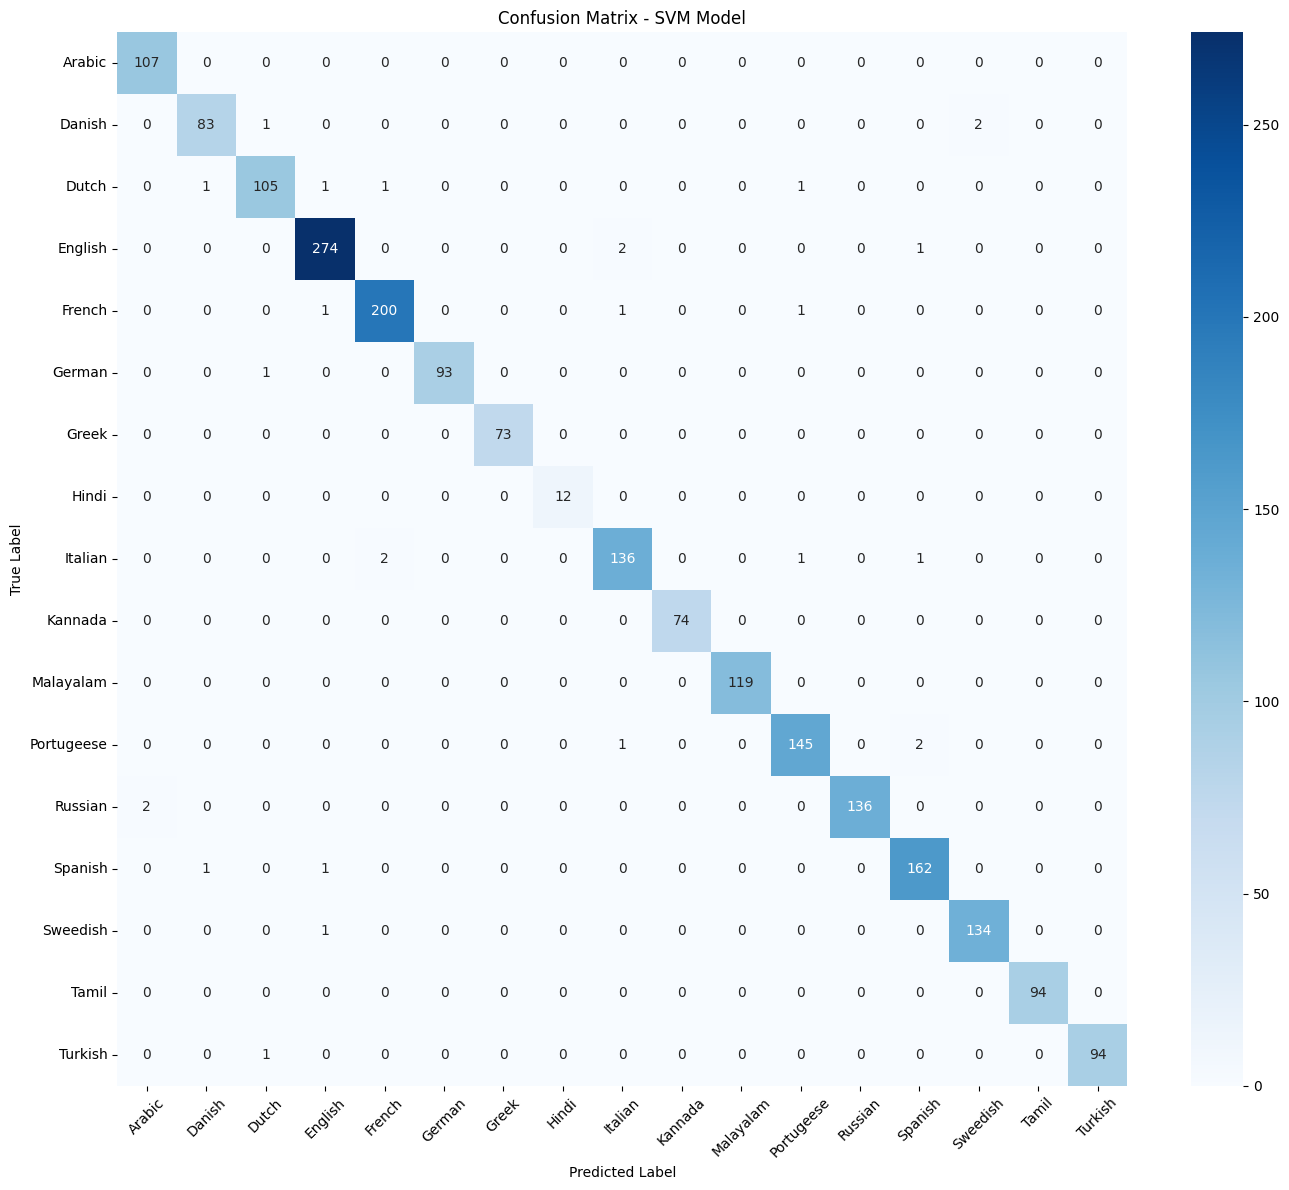

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.title('Confusion Matrix - SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


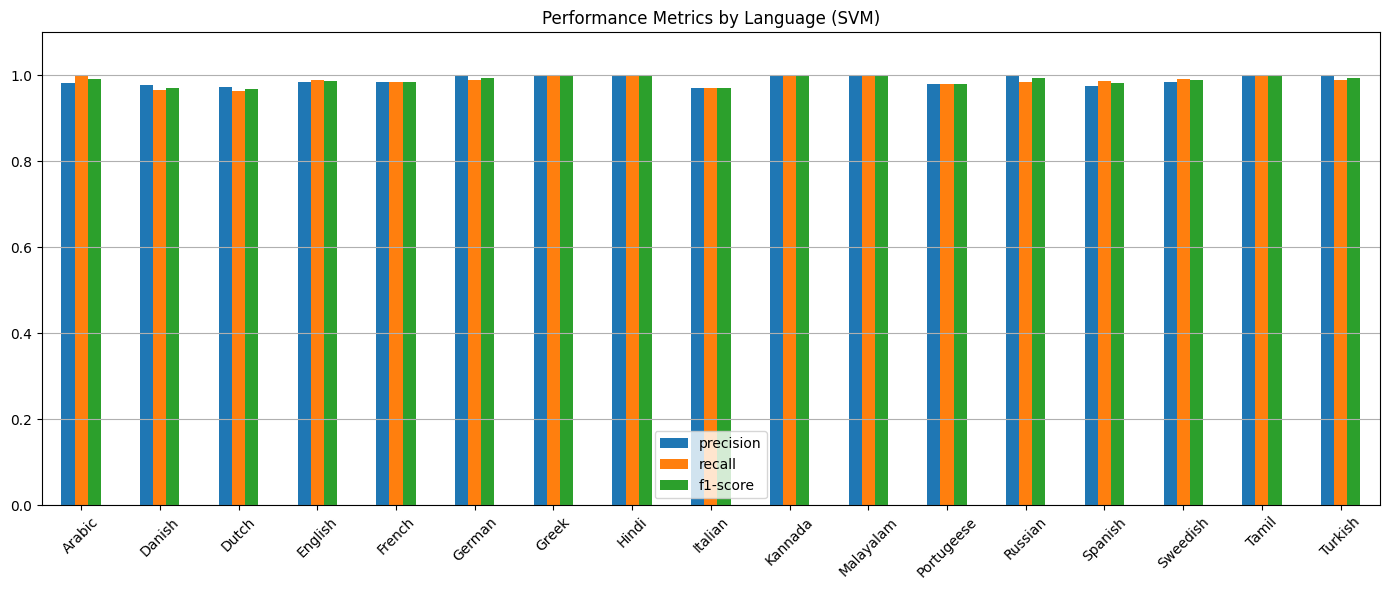

In [34]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_svm, output_dict=True, target_names=le.classes_)
report_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(14, 6))
plt.title('Performance Metrics by Language (SVM)')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


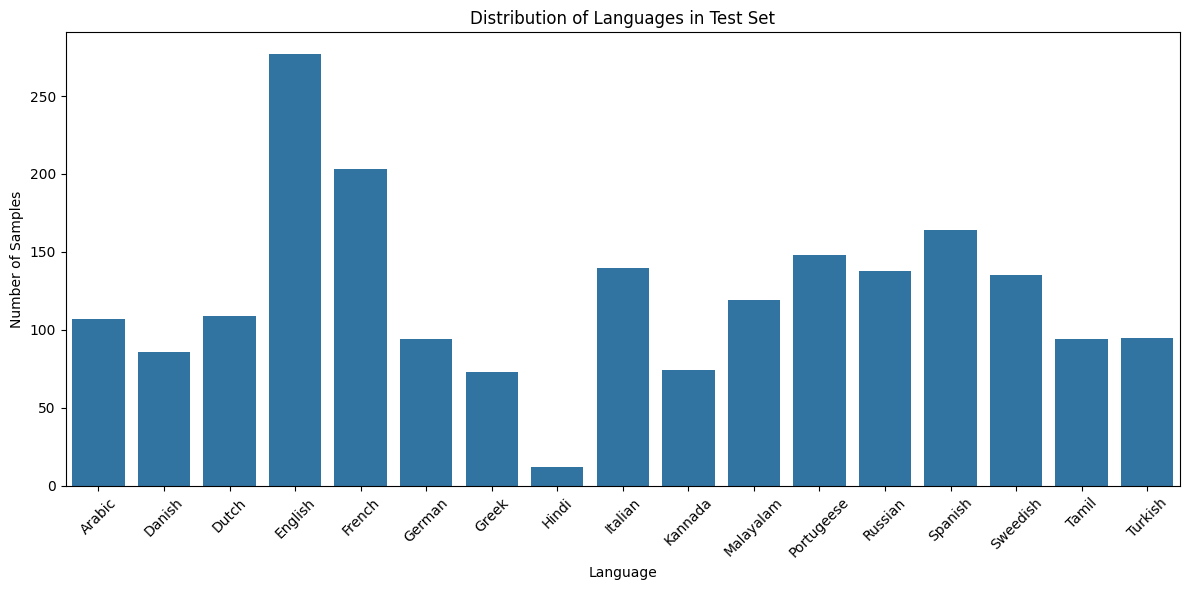

In [35]:
test_lang_counts = y_test.value_counts().sort_index()
lang_labels = le.inverse_transform(test_lang_counts.index)

plt.figure(figsize=(12, 6))
sns.barplot(x=lang_labels, y=test_lang_counts.values)
plt.title("Distribution of Languages in Test Set")
plt.xlabel("Language")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
def predict_language(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned])
    pred = svm_model.predict(vector)
    return le.inverse_transform(pred)[0]

# Try:
print(predict_language("Bonjour, comment allez-vous?"))
print(predict_language("നമസ്കാരം ഞാൻ മലയാളത്തിലാണ് സംസാരിക്കുന്നത്"))


French
Malayalam


In [37]:
test_sentences = [
    "Hello, how are you?",                      # English
    "നമസ്കാരം, എങ്ങിനെയാണ് കാര്യങ്ങൾ?",          # Malayalam
    "आप कैसे हैं?",                            # Hindi
    "எப்படி இருக்கிறீர்கள்?",                     # Tamil
    "ನೀವು ಹೇಗಿದ್ದೀರಾ?",                          # Kannada
    "Bonjour, comment allez-vous?",            # French
    "¿Cómo estás?",                            # Spanish
    "Olá, como você está?",                    # Portuguese
    "Ciao, come stai?",                        # Italian
    "Привет, как дела?",                       # Russian
    "Hej, hur mår du?",                        # Swedish
    "Hallo, hoe gaat het?",                    # Dutch
    "مرحبا كيف حالك؟",                         # Arabic
    "Merhaba, nasılsın?",                      # Turkish
    "Hallo, wie geht es dir?",                 # German
    "Hej, hvordan har du det?",                # Danish
    "Γεια σας, πώς είστε;"                     # Greek
]

# Predict languages
for text in test_sentences:
    predicted_lang = predict_language(text)
    print(f"Input: {text}\n→ Predicted Language: {predicted_lang}\n")


Input: Hello, how are you?
→ Predicted Language: English

Input: നമസ്കാരം, എങ്ങിനെയാണ് കാര്യങ്ങൾ?
→ Predicted Language: Malayalam

Input: आप कैसे हैं?
→ Predicted Language: Hindi

Input: எப்படி இருக்கிறீர்கள்?
→ Predicted Language: Tamil

Input: ನೀವು ಹೇಗಿದ್ದೀರಾ?
→ Predicted Language: Kannada

Input: Bonjour, comment allez-vous?
→ Predicted Language: French

Input: ¿Cómo estás?
→ Predicted Language: Spanish

Input: Olá, como você está?
→ Predicted Language: Portugeese

Input: Ciao, come stai?
→ Predicted Language: Italian

Input: Привет, как дела?
→ Predicted Language: Russian

Input: Hej, hur mår du?
→ Predicted Language: Sweedish

Input: Hallo, hoe gaat het?
→ Predicted Language: Dutch

Input: مرحبا كيف حالك؟
→ Predicted Language: Arabic

Input: Merhaba, nasılsın?
→ Predicted Language: Turkish

Input: Hallo, wie geht es dir?
→ Predicted Language: German

Input: Hej, hvordan har du det?
→ Predicted Language: Danish

Input: Γεια σας, πώς είστε;
→ Predicted Language: Greek



In [38]:
import joblib

# Save model
joblib.dump(svm_model, "language_detector_model.pkl")

# Save vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

# Save label encoder
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']